In [52]:
#import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [53]:
#read our data
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [54]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
#shape of our data
customer_data.shape

(200, 5)

In [56]:
#get the info about our data 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
#get the count of missing values in each column of our data
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [58]:
#rename some of cols 
customer_data = customer_data.rename(columns={'Genre': 'Gender','Annual Income (k$)':'Income',
                   'Spending Score (1-100)':'Score'})


In [59]:
# retrieve the column names
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Score'], dtype='object')

<Axes: xlabel='Age', ylabel='Income'>

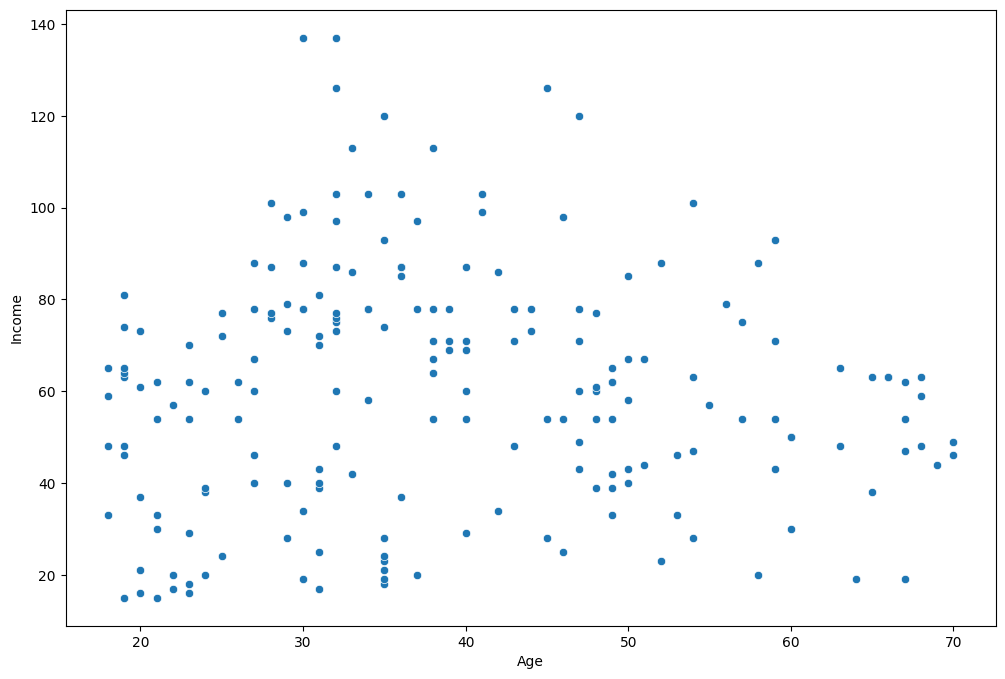

In [60]:
# This code creates a scatter plot of the 'Age' and 'Income' columns in the customer_data dataframe
plt.figure(figsize=(12,8))
sns.scatterplot(x=customer_data["Age"] , y=customer_data["Income"] )

<Axes: xlabel='Age', ylabel='Count'>

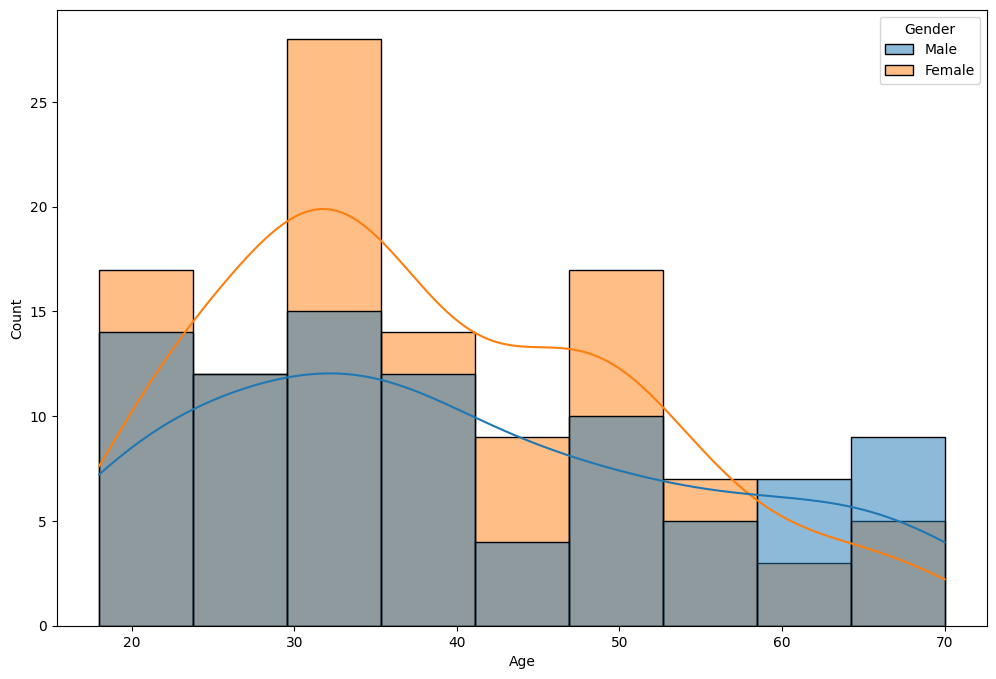

In [61]:
# This code creates a histogram of the 'Age' column in the customer_data dataframe, with separate bars for each gender
plt.figure(figsize=(12,8))
sns.histplot (x = 'Age' , hue='Gender' , data = customer_data , kde = True)

<Axes: >

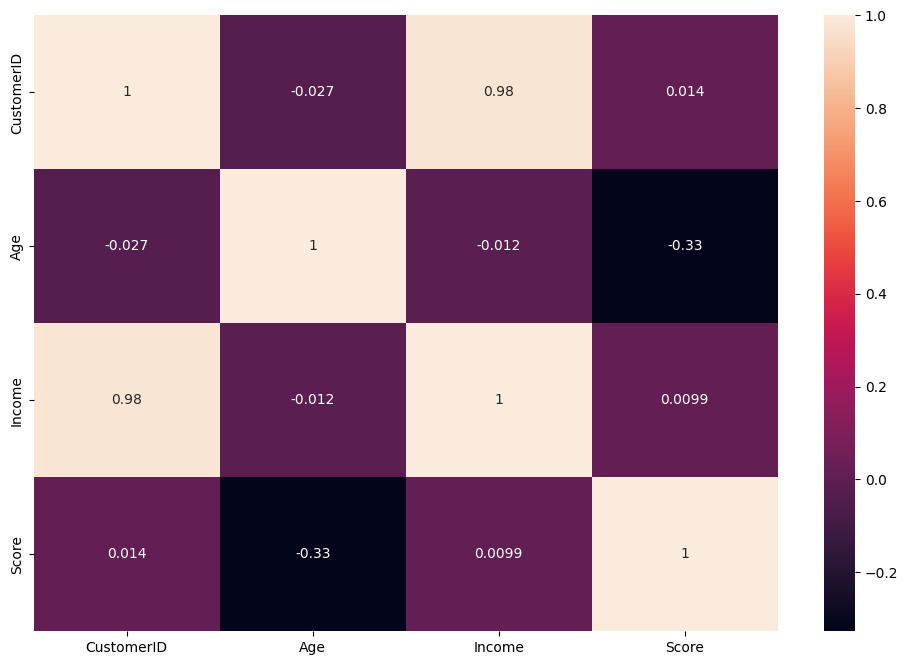

In [62]:
# This code creates a heatmap of the correlation matrix between the columns in the customer_data dataframe
plt.figure(figsize=(12,8))
sns.heatmap(customer_data.corr(), annot=True)

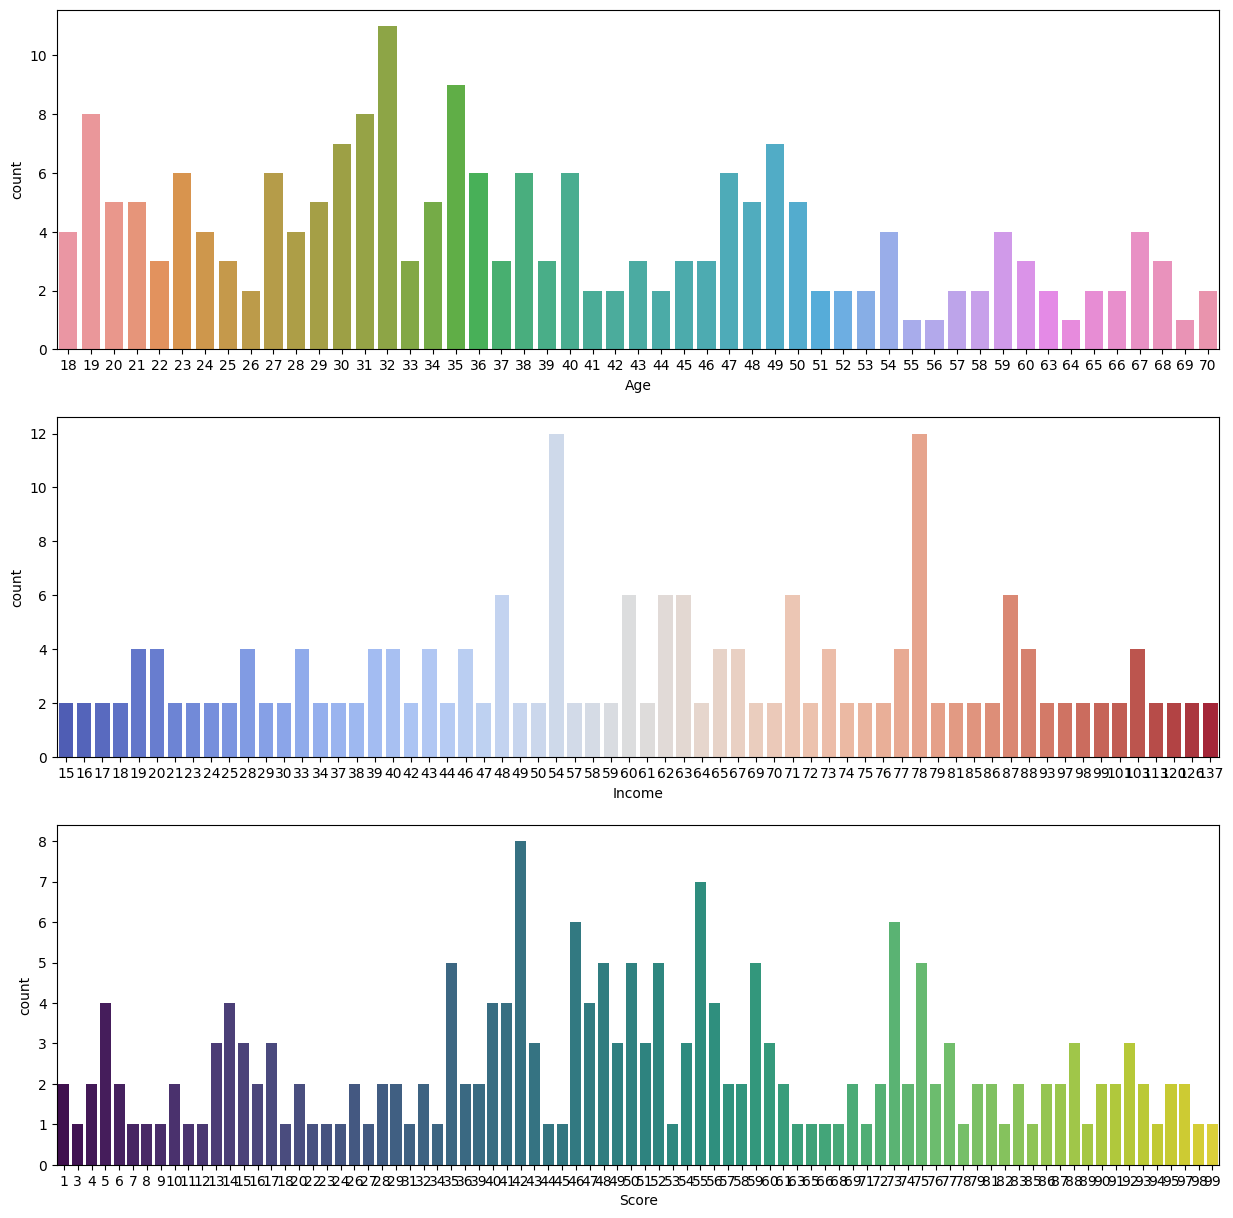

In [63]:
# This code creates a figure with three subplots using Seaborn library
plt.figure(figsize=(15,15))

# The first subplot is a countplot of the 'Age' column in the customer_data dataframe
# which shows the number of customers in each age group
plt.subplot(3,1,1)
sns.countplot(x='Age', data=customer_data)

# The second subplot is a countplot of the 'Income' column in the customer_data dataframe
# which displays the distribution of customer income levels
plt.subplot(3,1,2)
sns.countplot(x='Income', data=customer_data, palette="coolwarm")

# The third subplot is a countplot of the 'Score' column in the customer_data dataframe
# which represents a score given to customers based on their spending habits and other factors 
# that affect their relationship with the business
plt.subplot(3,1,3)
sns.countplot(x='Score', data=customer_data,palette="viridis")

# Finally, this line shows the complete figure with all three subplots
plt.show() 

In [64]:
#choosing "Income , Score" For predict
X=customer_data.iloc[:,[3,4]].values
print(X[1:10])

[[15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


In [65]:
# Create the KMeans model and fit it to the data
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Print the cluster centers
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


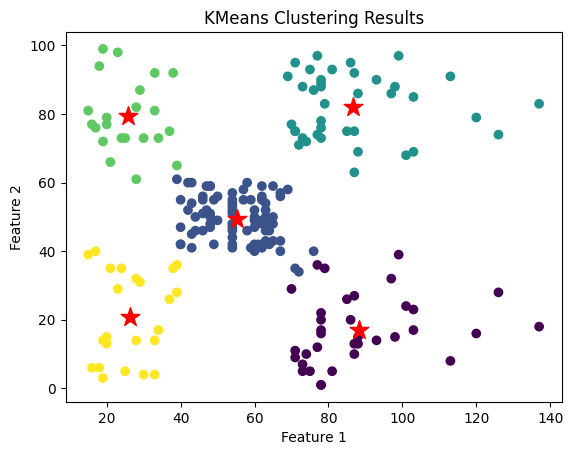

In [66]:
# Create a scatter plot of the data points with colors assigned by cluster assignment
plt.scatter(X[:, 0], X[:, 1], c=labels)

# Add the cluster centers to the plot in red
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='r')

# Set axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results')

# Show the plot
plt.show()